In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#I210503
#Muhammad Zian Ahmed
#CS - B

In [2]:
import numpy as np
import cv2
path = '/content/drive/MyDrive/Colab Notebooks/DIP2/'

#Question 1
#Part 1

Input Image


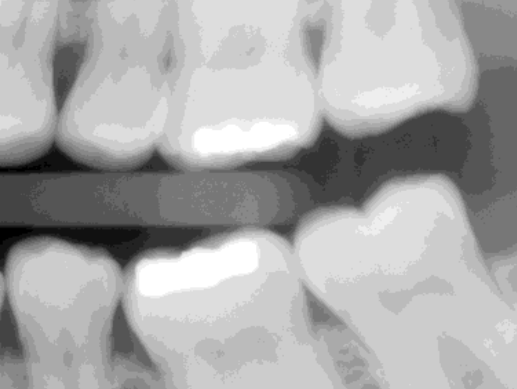

Seperated Teeth


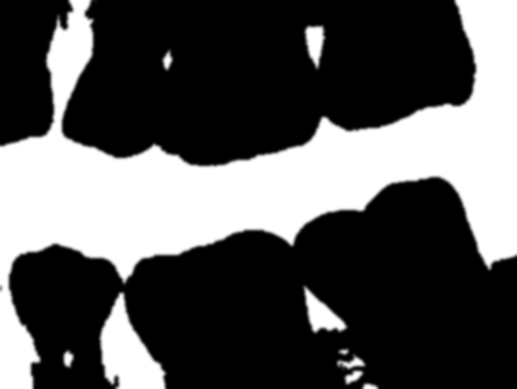

In [54]:
image = cv2.imread(path + 'Image_Q1.PNG')
print('Input Image')
cv2_imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, imgF = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
smooth = cv2.GaussianBlur(imgF,(7,7),0)
smooth = 255 - smooth
print('Seperated Teeth')
cv2_imshow(smooth)

#Part 2 & 3


Percentage of Affected Pixels: 2.6328481997682895


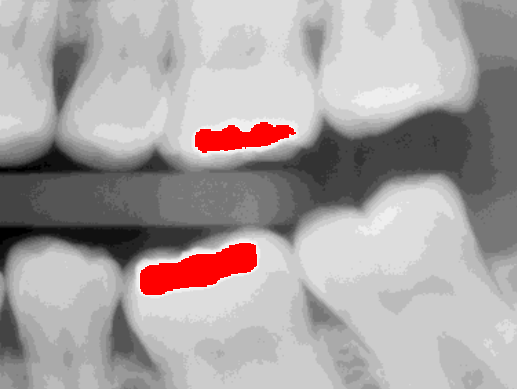

In [4]:
img = cv2.imread(path + 'Image_Q1.PNG')
total =0
red = 0
for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        total += 1
        if np.any(img[i][j]==(255,255,255)):
          img[i][j]=(0,0,255)
          red += 1
print(f'Percentage of Affected Pixels: {(red/total)*100}')
cv2_imshow(img)

#Question 2
#Part 1

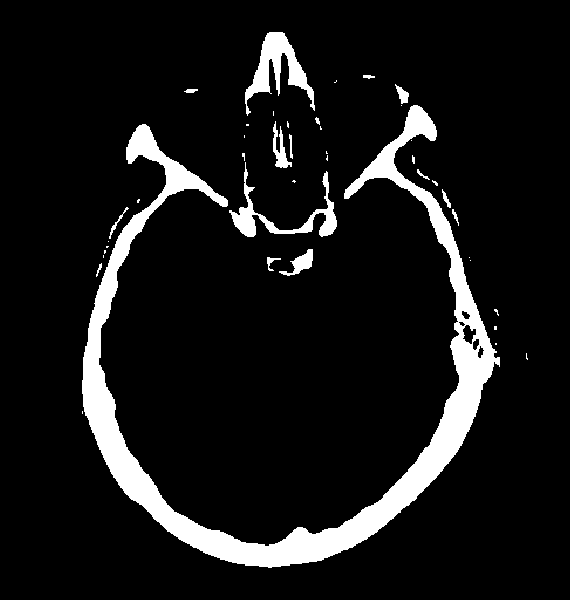

In [5]:
img = cv2.imread(path + "Image_Q2.tif")
for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if np.all(img[i][j]!=(255,255,255)):
          img[i][j]=(0,0,0)
cv2_imshow(img)

#Part 2

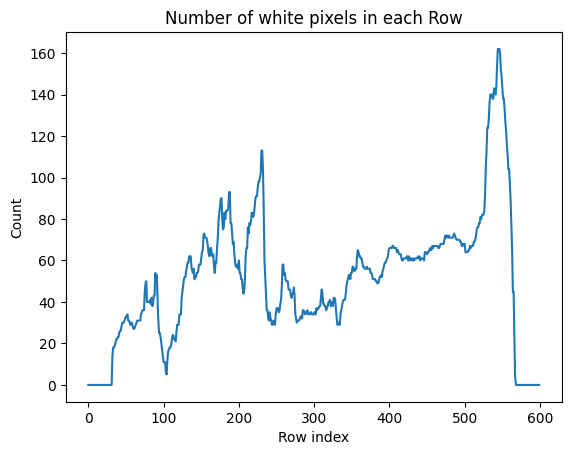

In [6]:
import matplotlib.pyplot as plt
row = []
for i in range(img.shape[0]):
      count = 0
      for j in range(img.shape[1]):
        if np.all(img[i][j]==(255,255,255)):
          count +=1
      row.append(count)

plt.plot(row)
plt.title('Number of white pixels in each Row')
plt.xlabel('Row index')
plt.ylabel('Count')
plt.show()

#Part 3

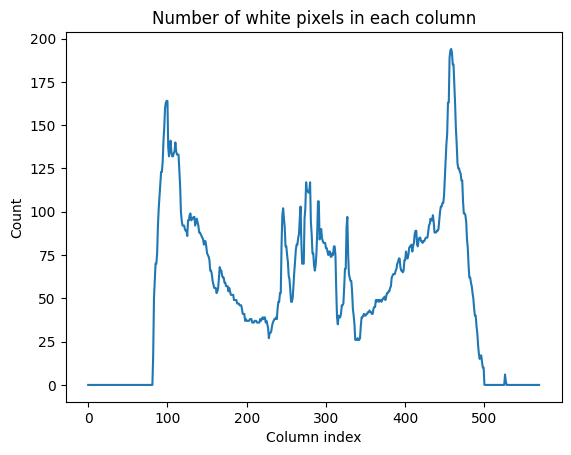

In [7]:
import matplotlib.pyplot as plt
col = []
for i in range(img.shape[1]):
      count = 0
      for j in range(img.shape[0]):
        if np.all(img[j][i]==(255,255,255)):
          count +=1
      col.append(count)

plt.plot(col)
plt.title('Number of white pixels in each column')
plt.xlabel('Column index')
plt.ylabel('Count')
plt.show()

#Question 3
Input

Parameter C: 10


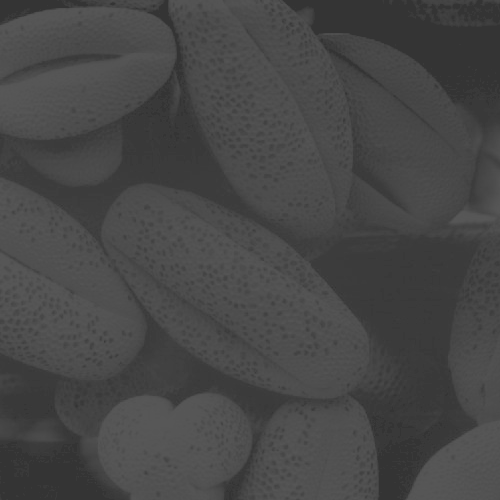

In [8]:
img = cv2.imread(path + "Image_Q3.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
out = 20*np.log(1+gray)
print(f'Parameter C: 10')
cv2_imshow(out)

Parameter C: 30


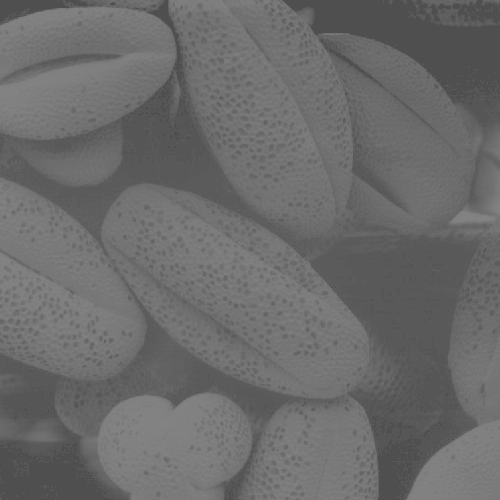

In [9]:
img = cv2.imread(path + "Image_Q3.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
out = 30*np.log(1+gray)
print(f'Parameter C: 30')
cv2_imshow(out)

Parameter C: 40


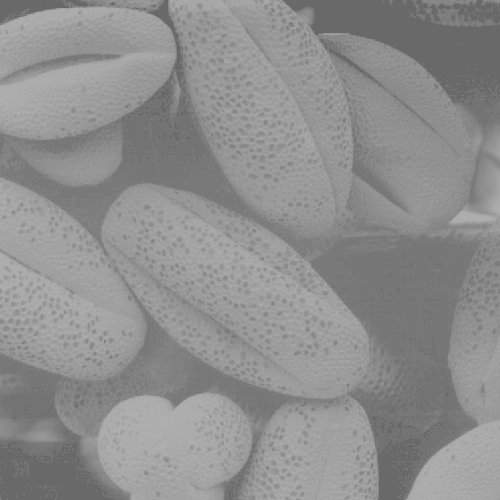

In [10]:
img = cv2.imread(path + "Image_Q3.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
out = 40*np.log(1+gray)
print(f'Parameter C: 40')
cv2_imshow(out)

Parameter C: 50


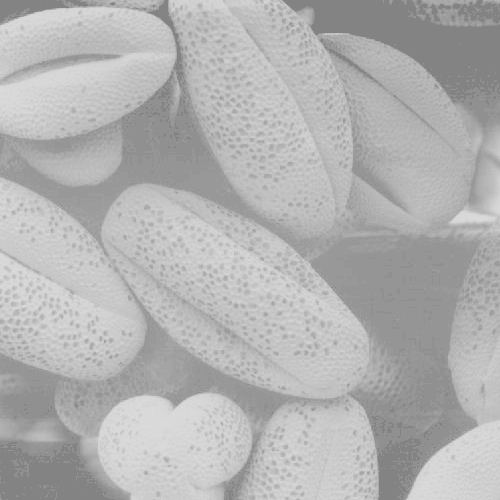

In [11]:
img = cv2.imread(path + "Image_Q3.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
out = 50*np.log(1+gray)
print(f'Parameter C: 50')
cv2_imshow(out)

Parameter C: 57.5514654694297


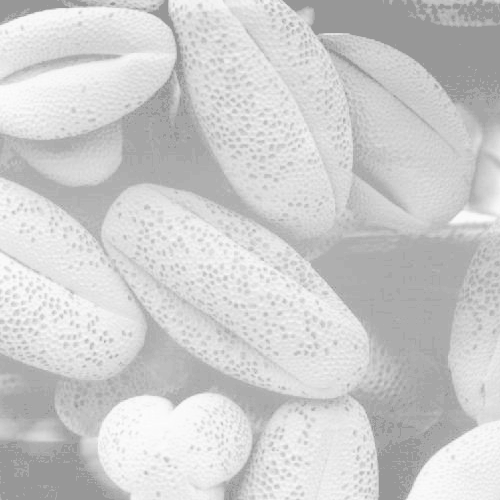

In [12]:
img = cv2.imread(path + "Image_Q3.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
c = 255 / np.log(1 + np.max(gray))
out = c*np.log(1+gray)
print(f'Parameter C: {c}')
cv2_imshow(out)

Parameter C: 60


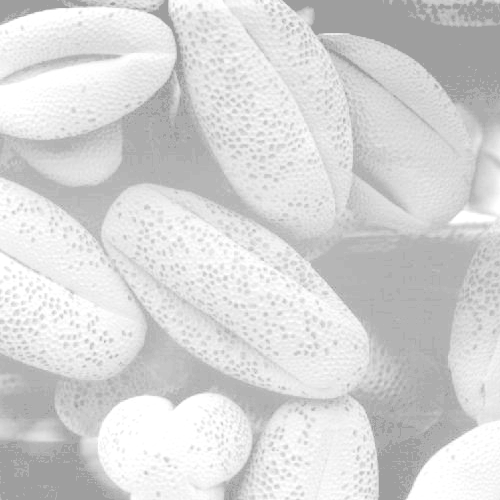

In [13]:
img = cv2.imread(path + "Image_Q3.tif")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(float)
c = 60
out = c*np.log(1+gray)
print(f'Parameter C: {c}')
cv2_imshow(out)

#Conlcusion
Best Parameter  where c = 255 / log(1+255)

For S = c*log(1+r)

#Question 4
#Part 1

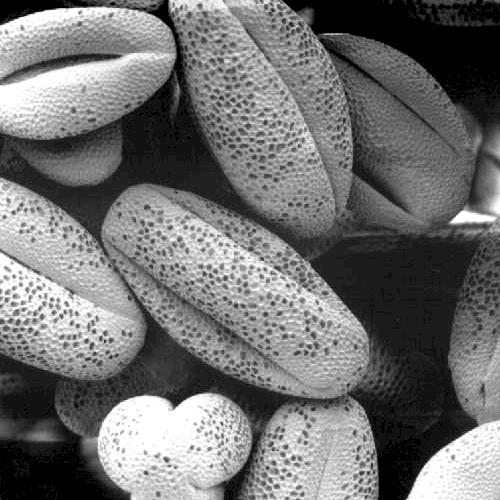

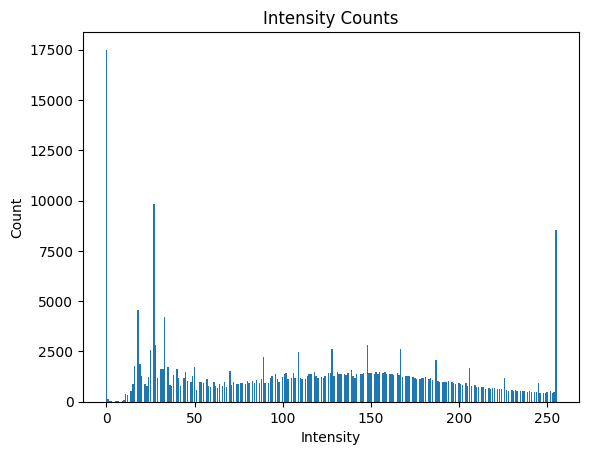

In [14]:
img = cv2.imread(path + "Image_Q4.tif",cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
pixel = dict()
for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        if img[i][j] in pixel:
          pixel[img[i][j]] += 1
        else:
          pixel[img[i][j]] = 1
plt.bar(pixel.keys(), pixel.values())
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Intensity Counts')
plt.show()

# Part 2

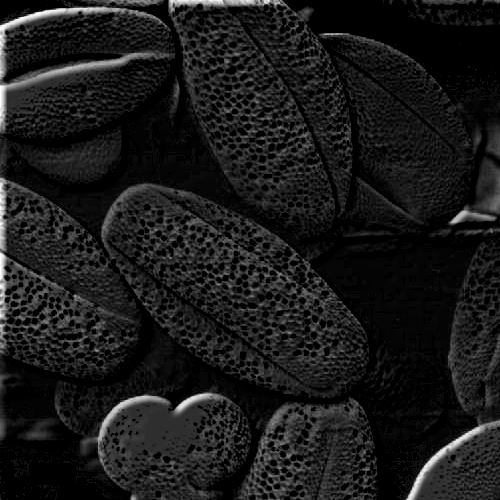

In [15]:
img = cv2.imread(path + "Image_Q4.tif",cv2.IMREAD_GRAYSCALE).astype(float)
mask7 = [[1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
         [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
         [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
         [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
         [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
         [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
         [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49]]

mask3 = [[-1, -1, -1],
         [-1,  8, -1],
         [-1, -1, -1]]


output7 = img.copy()
output3 = img.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        val = 0
        for a in range(7):
            for b in range(7):
                ia = i - 7 + a
                jb = j - 7 + b
                if 0 <= ia < img.shape[0] and  0 <= jb < img.shape[1]:
                    val += mask7[a][b] * img[ia][jb]
        output7[i][j] = val
        val = 0
        for a in range(3):
            for b in range(3):
                ia = i - 3 + a
                jb = j - 3 + b
                if 0 <= ia < img.shape[0] and  0 <= jb < img.shape[1]:
                    val += mask7[a][b] * img[ia][jb]
        output3[i][j] = val

img -= np.absolute(output7 - output3)
cv2_imshow(img)

#Question 5
#Function

In [16]:
def CheckBottle(img):
  empty = 0
  total = 0
  for i in range(img.shape[0]):
        for j in range(img.shape[1]):
          if img[i][j]>200:
            img[i][j]=255
            empty+=1
          elif img[i][j]>50:
            img[i][j]=100
            total += 1
  per = (total/(empty+total))*100
  print(f'Percentage of Bottle Filled: {per}')
  if per>=70:
    print("Bottle is Filled")
  else:
    print("Bottle is Empty")
  cv2_imshow(img)

#INPUT 1

Percentage of Bottle Filled: 70.31470286028339
Bottle is Filled


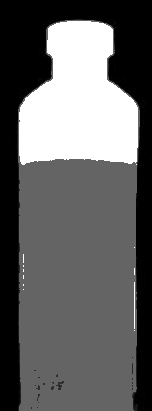

In [17]:
img = cv2.imread(path + "Image_Q5_1.PNG",cv2.IMREAD_GRAYSCALE)
CheckBottle(img)

#Output

Percentage of Bottle Filled: 88.56575365979255
Bottle is Filled


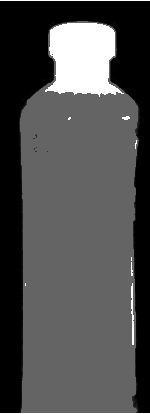

In [18]:
img = cv2.imread(path + "Image_Q5_2.PNG",cv2.IMREAD_GRAYSCALE)
CheckBottle(img)